In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (3, 7). You can assume the start point to be (2, 5). Plot the function and its contours along with the minimum value in that direction. Is the search direction a gradient descent one? Comment on that as well.

Ans:Yeah the search direction is a part of gradient descent because it moves towards the final lowest value here. So it would be a part of gradient descent one

0.9595959595959596
[ 5.05175781 12.12076823]


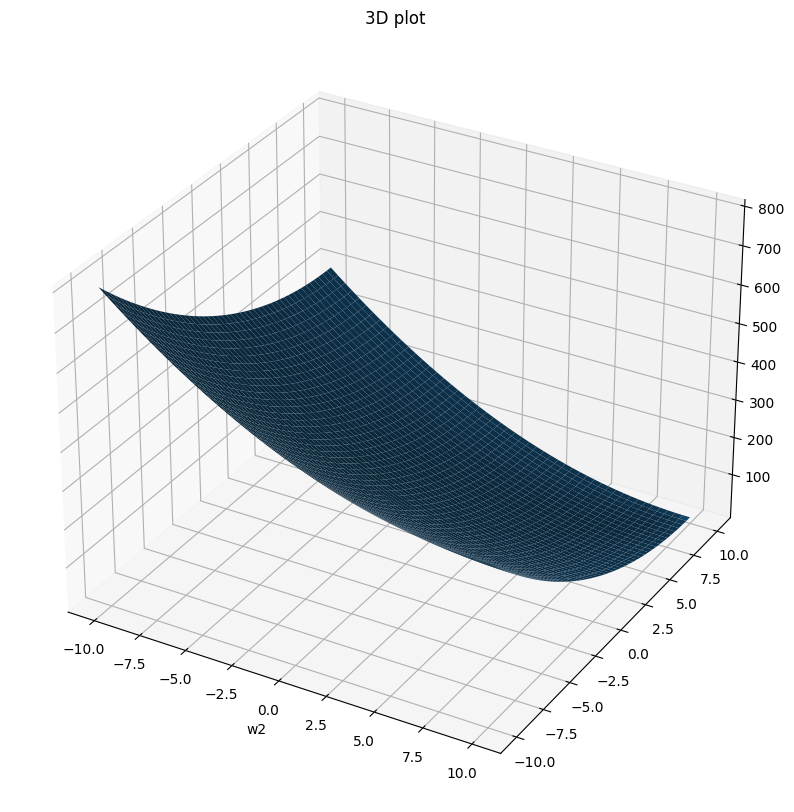

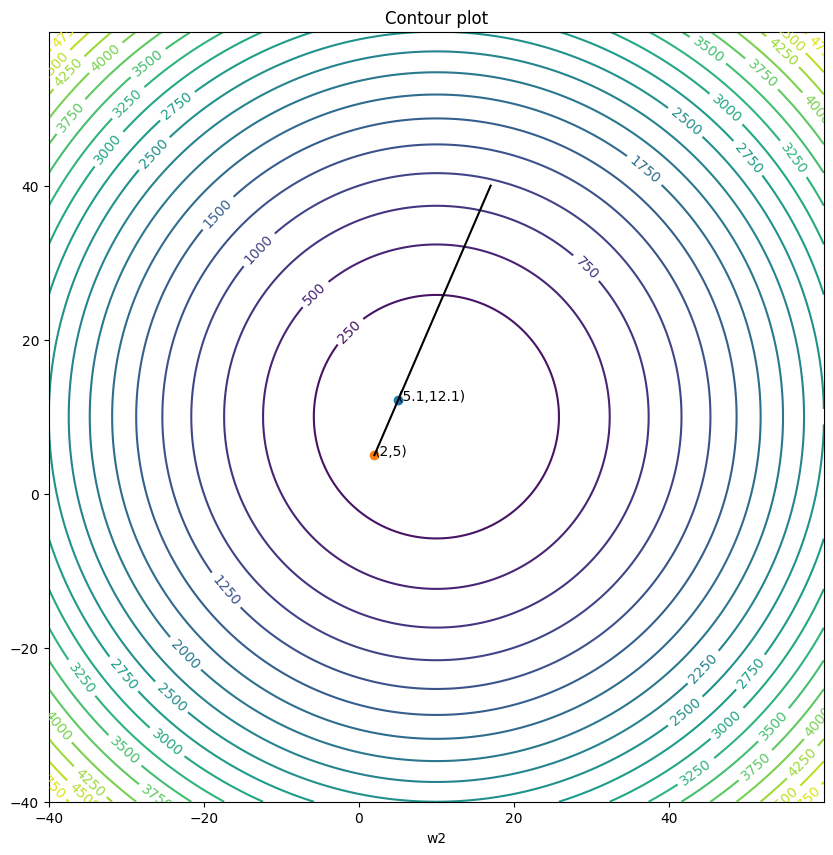

In [5]:
def Q1(w):
    return (w[0]-10)**2+(w[1]-10)**2
ALPHA = 0

class Multivariate_Optimization:
    def __init__(self,start,direction,range):
        self.start=np.array(start)
        self.direction=np.array(direction)
        self.range=range
    
    def bracketing(self,N,fn):
        for i in range(N-2):
            if fn(self.w_all[i]) >= fn(self.w_all[i+1]) <= fn(self.w_all[i+2]):
                return np.array([self.w_all[i],self.w_all[i+2]]),i
        if fn(self.w_all[0]) > fn(self.w_all[-1]):
            print(f"Highest Value at {self.w_all[0]}")
            return self.w_all[0]
        else:
            print(f"Highest Value at {self.w_all[-1]}")
            return self.w_all[-1]

    def region_elimination(self, range, e, fn):
        a= range[0]
        b= range[1]
        #print(a,b)
        #print((a-b)/4)
        L = (b-a)/4
        #print(f"L:{L}")

        if abs(np.average(L))<e:
            return (a+b)/2
        
        wm = (a+b)/2

        w1 = a + L
        w2 = b - L
        
        #print(f"w1:{w1}\nw2:{w2}\nwm:{wm}")

        if fn(w1) < fn(wm):
            return self.region_elimination(np.array([a, wm]), e, fn)
        elif fn(w2) < fn(wm):
            return self.region_elimination(np.array([wm, b]), e, fn)
        else:
            return self.region_elimination(np.array([w1,w2]), e, fn)

    def line_search(self,N,e,fn):
        self.alpha = np.linspace(0,self.range,N)
        self.w_all=[]
        for i in self.alpha:
            self.w = self.start+self.direction*i
            self.w_all+=[list(self.w)]
        self.w_all=np.array(self.w_all)
        #print(self.w_all)
        if len(self.bracketing(N,fn))==2:
            new_value, i = self.bracketing(N,fn)
            #print(new_value)
            min_value = self.region_elimination(new_value, e, fn)
            self.plotting(min_value,self.start,fn=fn)
            return min_value,self.alpha[i]
        else:
            return self.bracketing(N,fn)
    
    def line_search_Salpha(self,N,e,fn,alp):
        
        new_val = self.start+self.direction*alp
        
        self.plotting(new_val,self.start,fn=fn)
        return new_val
        
        
    def plotting(self,*args,fn):

        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        x=np.arange(-10,10,0.01)
        y=np.arange(-10,10,0.01)
        X,Y=np.meshgrid(np.arange(-40,60,0.01),np.arange(-40,60,0.01))
        Z= fn((X,Y))
        c=ax.contour(X,Y,Z, levels=20)
        ax.clabel(c)
        for i in args:
            ax.plot(i[0],i[1],'o')
            ax.text(i[0],i[1],f"({round(i[0],1)},{round(i[1],1)})")
            ax.set_title("Contour plot")
            ax.set_xlabel("w1")
            ax.set_xlabel("w2")
        X1,Y1=self.w_all[0][0],self.w_all[0][1]
        X2,Y2=self.w_all[-1][0],self.w_all[-1][1]

        ax.plot((X1,X2),(Y1,Y2),color='black')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
x=np.arange(-10,10,0.01)
y=np.arange(-10,10,0.01)
X,Y=np.meshgrid(x,y)
ax.plot_surface(X,Y,Q1((X,Y)))
ax.set_title("3D plot")
ax.set_xlabel("w1")
ax.set_xlabel("w2")

J1=Multivariate_Optimization((2,5),(3,7),5)
min_J1, ALPHA = J1.line_search(100, 0.0001, Q1)
print(ALPHA)
print(min_J1)
#J1.plotting(min_J1,fn=Q1)
#print(min_J1)